Library import


In [35]:
from tensorflow.keras.datasets import mnist 
import matplotlib.pyplot as plt 
from PIL import Image 
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
import numpy as np

Load dataset

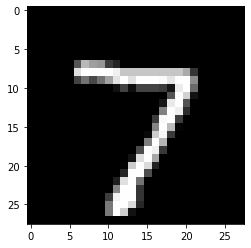

In [36]:
(x_train_org, y_train_org),(x_test_org,y_test_org) = mnist.load_data()
x_test_org[0]
n_rec = 0
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA'))
plt.show()

Change image format

In [37]:
x_train = x_train_org.reshape(60000,784)
x_test = x_test_org.reshape(10000,784)


Normalize data

In [38]:
x_train = x_train.astype('float32')
x_train = x_train / 255
x_test = x_test.astype('float32')
x_test = x_test / 255 
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

Neural Network

In [39]:
model = Sequential()
model.add(Dense(800, input_dim=784, activation="relu"))
model.add(Dense(400, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Компилируем модель
print(model.summary()) #Вывод структуры модели

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_4 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


NN train

In [40]:
model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)
model.save_weights('model.h5')
model.load_weights('model.h5')

Epoch 1/15
469/469 [==============================] - 8s 16ms/step - loss: 0.3754 - accuracy: 0.8907
Epoch 2/15
469/469 [==============================] - 7s 16ms/step - loss: 0.0786 - accuracy: 0.9754
Epoch 3/15
469/469 [==============================] - 7s 16ms/step - loss: 0.0464 - accuracy: 0.9851
Epoch 4/15
469/469 [==============================] - 7s 16ms/step - loss: 0.0312 - accuracy: 0.9898
Epoch 5/15
469/469 [==============================] - 7s 16ms/step - loss: 0.0226 - accuracy: 0.9926
Epoch 6/15
469/469 [==============================] - 7s 16ms/step - loss: 0.0199 - accuracy: 0.9931
Epoch 7/15
469/469 [==============================] - 7s 16ms/step - loss: 0.0158 - accuracy: 0.9946
Epoch 8/15
469/469 [==============================] - 7s 16ms/step - loss: 0.0160 - accuracy: 0.9944
Epoch 9/15
469/469 [==============================] - 7s 16ms/step - loss: 0.0122 - accuracy: 0.9959
Epoch 10/15
469/469 [==============================] - 7s 16ms/step - loss: 0.0105 - accura

Digit recognition

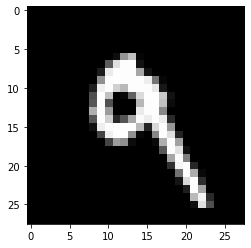

[[2.5998554e-15 1.4528217e-13 4.2250258e-14 9.1241903e-09 8.5745393e-09
  1.0822649e-11 4.7393051e-20 2.9273453e-09 1.1179643e-11 1.0000000e+00]]
9


In [43]:
n_rec = 7
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA'))
plt.show()
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)
prediction = model.predict(x)
print(prediction)
prediction = np.argmax(prediction)
print(prediction)